# Import Libraries / Packages

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf

from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

print(tf.__version__)

2.15.0


# Load dataset (extract .zip to /tmp)

In [11]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define training and validation directory

In [20]:
base_dir = 'images'
train_dir = os.path.join(base_dir, '/tmp/images/train')
validation_dir = os.path.join(base_dir, '/tmp/images/val')

print(train_dir)
print(validation_dir)

/tmp/images/train
/tmp/images/val


In [12]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [14]:
os.listdir('/tmp/images/val')

['messy', 'clean']

# Train and Validation Data Generator

In [17]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range = 0.2,
  fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
print(test_datagen)

In [21]:
train_generator = train_datagen.flow_from_directory(
  train_dir,  # direktori data latih
  target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size=4,
  # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
  class_mode='binary'
)
print(train_generator)

Found 192 images belonging to 2 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(
  validation_dir, # direktori data validasi
  target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
  class_mode='binary'
)
print(validation_generator)

Found 20 images belonging to 2 classes.


# Modeling

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Model Compiling

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(
  loss='binary_crossentropy',
  optimizer=tf.optimizers.Adam(),
  metrics=['accuracy']
)

## Train the model

In [ ]:
# latih model dengan model.fit
model.fit(
  train_generator,
  steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
  epochs=20, # tambahkan epochs jika akurasi model belum optimal
  validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
  validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
  verbose=2
)

# Testing the model

Saving messy-room-1.jpg to messy-room-1 (1).jpg
1/1 [==============================] - 0s 40ms/step
messy-room-1 (1).jpg
messy


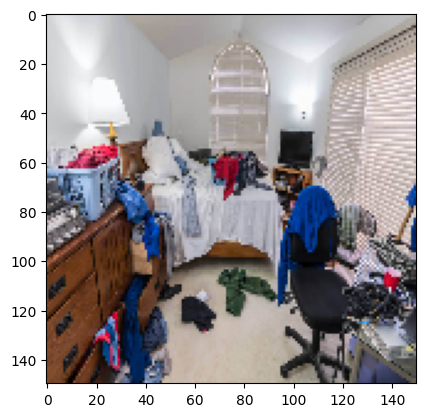

In [30]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')